<P> <B> <font color=red size="4"> 3.BRICH Clustering</Font></B> </P>

In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import Birch
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # Ground truth

<b><font color=green size="4">BIRCH Clustering</font></b>
<ol>
   <li> The Birch class is used with n_clusters=3 to specify the number of clusters (optional). If n_clusters is not provided, BIRCH performs hierarchical clustering based on the threshold parameter.</li>
    <li>.The output y_birch contains the cluster assignments for each data point.</li></ol>

In [9]:
# Apply BIRCH clustering
birch = Birch(n_clusters=3)
y_birch = birch.fit_predict(X)

In [10]:
# Internal Metrics
silhouette_avg = silhouette_score(X, y_birch)
calinski_harabasz = calinski_harabasz_score(X, y_birch)
davies_bouldin = davies_bouldin_score(X, y_birch)


In [11]:
# External Metrics
adjusted_rand = adjusted_rand_score(y, y_birch)
normalized_mutual_info = normalized_mutual_info_score(y, y_birch)
homogeneity = homogeneity_score(y, y_birch)
completeness = completeness_score(y, y_birch)
v_measure = v_measure_score(y, y_birch)

In [12]:
# Display the results
results = pd.DataFrame({
    "Metric": [
        "Silhouette Coefficient",
        "Davies-Bouldin Index",
        "Calinski-Harabasz Index",
        "Adjusted Rand Index",
        "Normalized Mutual Information",
        "Homogeneity",
        "Completeness",
        "V-Measure"
    ],
    "Score": [
        silhouette_avg,
        davies_bouldin,
        calinski_harabasz,
        adjusted_rand,
        normalized_mutual_info,
        homogeneity,
        completeness,
        v_measure
    ]
})

print(results)

                          Metric       Score
0         Silhouette Coefficient    0.501952
1           Davies-Bouldin Index    0.625831
2        Calinski-Harabasz Index  458.472511
3            Adjusted Rand Index    0.609625
4  Normalized Mutual Information    0.705099
5                    Homogeneity    0.674706
6                   Completeness    0.738360
7                      V-Measure    0.705099


In [13]:
# Reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


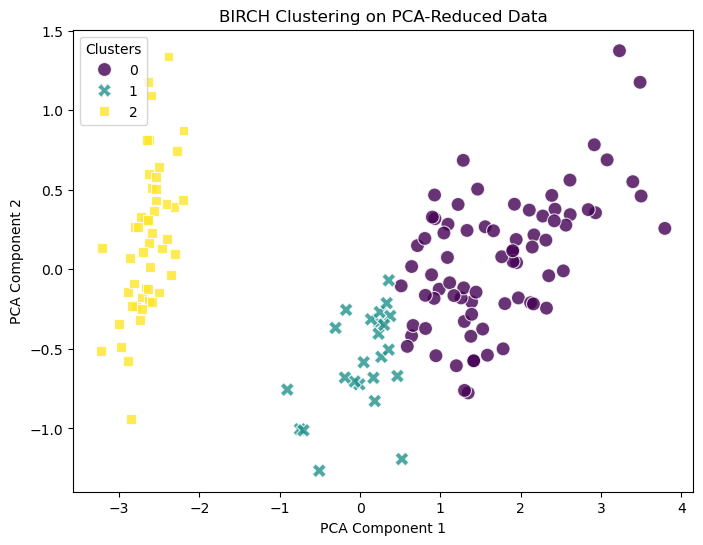

In [14]:
# Visualization of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y_birch, palette='viridis', style=y_birch, s=100, alpha=0.8
)
plt.title('BIRCH Clustering on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters')
plt.show()

<b><font color=green size="4">1.Elbow Method:</font></b>

The Elbow Method uses the Within-Cluster Sum of Squares (WCSS) to determine the optimal number of clusters. The idea is to find the point where adding more clusters doesn't significantly reduce WCSS, forming an "elbow" in the graph.

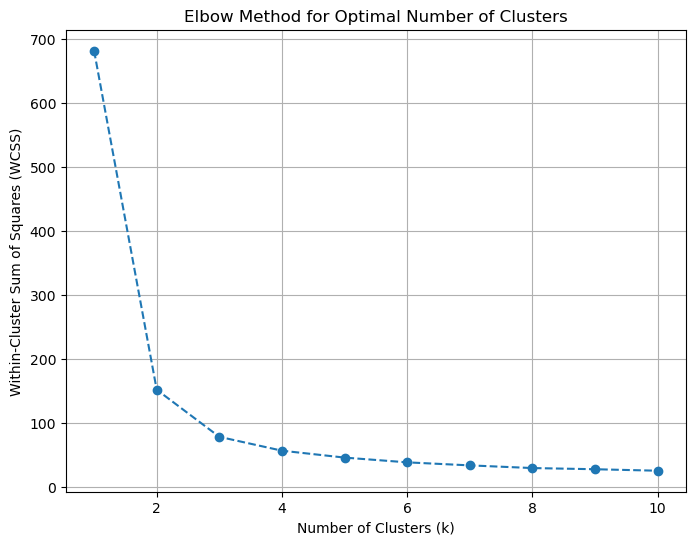

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different numbers of clusters
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()


<b><font color=green size="4">2.Silhouette Analysis:</font></b>

Silhouette Analysis evaluates how well each data point fits within its cluster. Higher average silhouette scores indicate better clustering.

Number of clusters: 2, Average Silhouette Score: 0.681


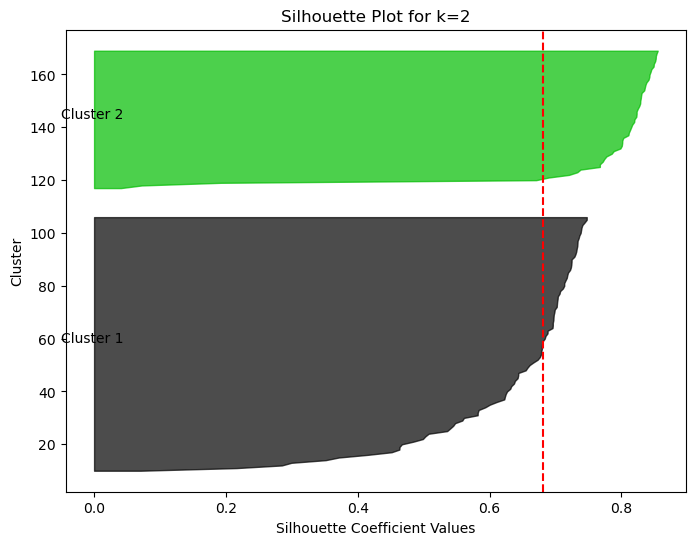

Number of clusters: 3, Average Silhouette Score: 0.553


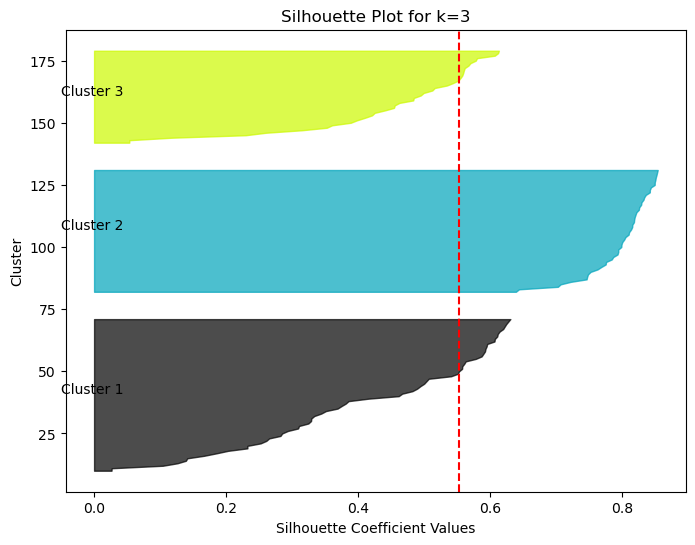

Number of clusters: 4, Average Silhouette Score: 0.498


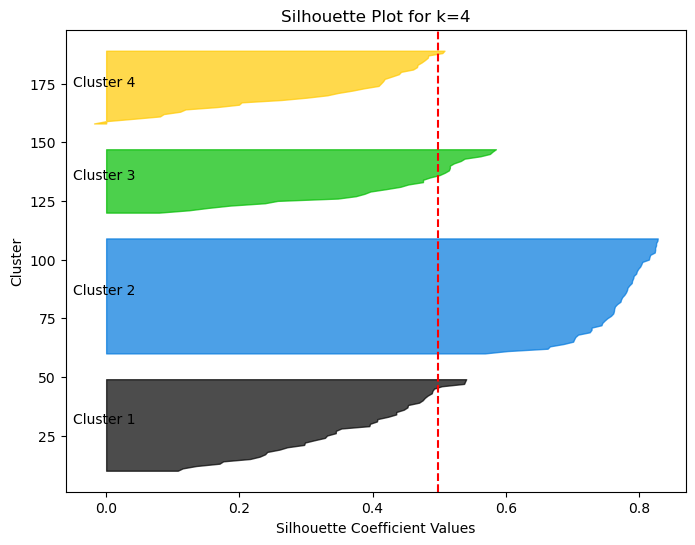

Number of clusters: 5, Average Silhouette Score: 0.491


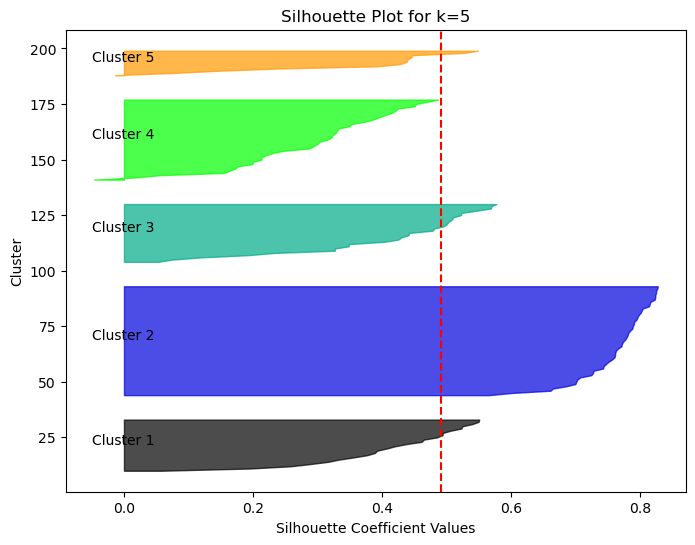

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.cm as cm

# Perform Silhouette Analysis for different numbers of clusters
for n_clusters in range(2, 6):  # Testing for 2 to 5 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Number of clusters: {n_clusters}, Average Silhouette Score: {silhouette_avg:.3f}")

    # Compute Silhouette Scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Silhouette Plot
    plt.figure(figsize=(8, 6))
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cluster {i + 1}")
        y_lower = y_upper + 10  # Add gap between clusters

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(f"Silhouette Plot for k={n_clusters}")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.show()
